In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Datas: 
https://ec.europa.eu/eurostat/web/microdata/statistics-on-income-and-living-conditions

##### Documentation:
https://circabc.europa.eu/faces/jsp/extension/wai/navigation/container.jsp?FormPrincipal:_idcl=FormPrincipal:_id1&FormPrincipal_SUBMIT=1&id=c31bb5ae-2de6-49d3-bdcb-21992b3a2935&javax.faces.ViewState=meuDdJMlFsG5yNkNcejyPL481TffTqBlmAoXxLv4eKPClWnkj%2FIBx85kqWpflSLguyT5ndOI7k0APPg0%2F305IGJeFLWQfTP7dBwL1Bo1Kxt7G7Quw5NsD8LJJe9kdthN%2B%2BdW8EdW%2BAC%2FqwKdG11ap%2Fd0I6k%3D

# 1. Data Import and decide which one to use

## 1.1 Household Data Germany

### 1.1.1 Houshold Register Data

In [16]:
hhd = pd.read_csv("./data/DE_2013d_EUSILC.csv")

In [17]:
hhd.shape

(12703, 17)

In [18]:
hhd.isna().sum()

DB010          0
DB020          0
DB030          0
DB040      12703
DB040_F    12703
DB060      12703
DB060_F    12703
DB062      12703
DB062_F    12703
DB070      12703
DB070_F    12703
DB075      12703
DB075_F    12703
DB090          0
DB090_F    12703
DB100      12703
DB100_F    12703
dtype: int64

In [19]:
## conlusion: no additional information to the next dataset

### 1.1.2 Houshold Survey Data

In [20]:
hhh = pd.read_csv("./data/DE_2013h_EUSILC.csv")

In [21]:
hhh.shape

(12703, 216)

In [22]:
## Drop columns with more than 20% nans
hhh=hhh.dropna(thresh=len(hhh)*0.8, axis=1)
hhh.shape

(12703, 49)

In [23]:
hhh.columns

Index(['HB010', 'HB020', 'HB030', 'HB050', 'HB060', 'HB100', 'HY010', 'HY020',
       'HY022', 'HY023', 'HY040G', 'HY050G', 'HY060G', 'HY070G', 'HY080G',
       'HY081G', 'HY090G', 'HY100G', 'HY110G', 'HY120G', 'HY130G', 'HY131G',
       'HY140G', 'HY170G', 'HS021', 'HS040', 'HS050', 'HS060', 'HS070',
       'HS080', 'HS090', 'HS100', 'HS110', 'HS120', 'HS130', 'HS140', 'HS160',
       'HS170', 'HS180', 'HS190', 'HH010', 'HH021', 'HH030', 'HH040', 'HH050',
       'HH070', 'HH081', 'HH091', 'HD080'],
      dtype='object')

In [24]:
## dictionary based on
columnnames = {
"HB010": "HB010: YEAR OF THE SURVEY", 
"HB020": "HB020: COUNTRY", 
"HB030": "HB030: HOUSEHOLD ID", 
"HB050": "HB050: MONTH OF HOUSEHOLD INTERVIEW",
"HB060": "HB060: YEAR OF HOUSEHOLD INTERVIEW",
"HB100": "HB100: NUMBER OF MINUTES TO COMPLETE THE HOUSEHOLD QUESTIONNAIRE", 
"HH010": "HH010: DWELLING TYPE",
"HH021": "HH021: TENURE STATUS",
"HH030": "HH030: NUMBER OF ROOMS AVAILABLE TO THE HOUSEHOLD", 
"HH031": "HH031: YEAR OF CONTRACT OR PURCHASING OR INSTALLATION",
"HH040": "HH040: LEAKING ROOF, DAMP WALLS/FLOORS/FOUNDATION, OR ROT IN WINDOW FRAMES OR FLOOR", 
"HH050": "HH050: BILITY TO KEEP HOME ADEQUATELY WARM",
"HH060": "HH060: CURRENT RENT RELATED TO OCCUPIED DWELLING", 
"HH061": "HH061: SUBJECTIVE RENT", 
"HH070": "HH070: TOTAL HOUSING COST",
"HH071": "HH071: MORTGAGE PRINCIPAL REPAYMENT",
"HH081": "HH081: BATH OR SHOWER IN DWELLING",
"HH091": "HH091: INDOOR FLUSHING TOILET FOR SOLE USE OF HOUSEHOLD",
"HS011": "HS011: ARREARS ON MORTGAGE OR RENT PAYMENTS",
"HS021": "HS021: ARREARS ON UTILITY BILLS",
"HS031": "HS031: ARREARS ON HIRE PURCHASE INSTALMENTS OR OTHER LOAN PAYMENTS",
"HS040": "HS040: CAPACITY TO AFFORD PAYING FOR ONE WEEK ANNUAL HOLIDAY AWAY FROM HOME",
"HS050": "HS050: CAPACITY TO AFFORD A MEAL WITH MEAT, CHICKEN, FISH (OR VEGETARIAN EQUIVALENT) EVERY SECOND DAY" ,
"HS060": "HS060: CAPACITY TO FACE UNEXPECTED FINANCIAL EXPENSES",
"HS070": "HS070: DO YOU HAVE A TELEPHONE (INCLUDING MOBILE PHONE)",
"HS080": "HS080: DO YOU HAVE A COLOUR TV", 
"HS090": "HS090: DO YOU HAVE A COMPUTER",
"HS100": "HS100: DO YOU HAVE A WASHING MACHINE",
"HS110": "HS110: DO YOU HAVE A CAR", 
"HS120": "HS120: ABILITY TO MAKE ENDS MEET",
"HS130": "HS130: LOWEST MONTHLY INCOME TO MAKE ENDS MEET",
"HS140": "HS140: FINANCIAL BURDEN OF THE TOTAL HOUSING COST",
"HS150": "HS150: FINANCIAL BURDEN OF THE REPAYMENT OF DEBTS FROM HIRE PURCHASES OR LOANS",
"HS160": "HS160: PROBLEMS WITH THE DWELLING: TOO DARK, NOT ENOUGH LIGHT",
"HS170": "HS170: NOISE FROM NEIGHBOURS OR FROM THE STREET",
"HS180": "HS180: POLLUTION, GRIME OR OTHER ENVIRONMENTAL PROBLEMS",
"HS190": "HS190: CRIME VIOLENCE OR VANDALISM IN THE AREA",
"HY010": "HY010: TOTAL HOUSEHOLD GROSS INCOME",
"HY020": "HY020: TOTAL DISPOSABLE HOUSEHOLD INCOME" ,
"HY022": "HY022: TOTAL DISPOSABLE HOUSEHOLD INCOME BEFORE SOCIAL TRANSFERS OTHER THAN OLD-AGE AND SURVIVOR'S BENEFITS", 
"HY023": "HY023: TOTAL DISPOSABLE HOUSEHOLD INCOME BEFORE SOCIAL TRANSFERS INCLUDING OLD-AGE AND SURVIVOR'S BENEFITS", 
"HY025": "HY025: WITHIN-HOUSEHOLD NON-RESPONSE INFLATION FACTOR", 
"HY030G": "HY030G: IMPUTED RENT",
"HY040G": "HY040G: INCOME FROM RENTAL OF A PROPERTY OR LAND",
"HY090G": "HY090G: INTEREST, DIVIDENDS, PROFIT FROM CAPITAL INVESTMENTS IN UNINCORPORATED BUSINESS",
"HY050G": "HY050G: FAMILY/CHILDREN RELATED ALLOWANCES",
"HY060G": "HY060G: SOCIAL EXCLUSION NOT ELSEWHERE CLASSIFIED",
"HY070G": "HY070G: HOUSING ALLOWANCES",
"HY080G": "HY080G: REGULAR INTER-HOUSEHOLD CASH TRANSFER RECEIVED", 
"HY081G": "HY081G: ALIMONIES RECEIVED (COMPULSORY + VOLUNTARY)",
"HY100G": "HY100G: INTEREST REPAYMENTS ON MORTGAGE",
"HY110G": "HY110G: INCOME RECEIVED BY PEOPLE AGED UNDER", 
"HY120G": "HY120G: REGULAR TAXES ON WEALTH",
"HY130G": "HY130G: REGULAR INTER-HOUSEHOLD CASH TRANSFER PAID",
"HY131G": "HY131G: ALIMONIES PAID (COMPULSORY + VOLUNTARY)",
"HY140G": "HY140G: TAX ON INCOME AND SOCIAL CONTRIBUTIONS", 
"HY145N": "HY145N: REPAYMENTS/RECEIPTS FOR TAX ADJUSTMENT",
"HY170G": "HY170G: VALUE OF GOODS PRODUCED FOR OWN CONSUMPTION",
}

In [25]:
hhh = hhh.rename(columns=columnnames)
hhh.columns

Index(['HB010: YEAR OF THE SURVEY', 'HB020: COUNTRY', 'HB030: HOUSEHOLD ID',
       'HB050: MONTH OF HOUSEHOLD INTERVIEW',
       'HB060: YEAR OF HOUSEHOLD INTERVIEW',
       'HB100: NUMBER OF MINUTES TO COMPLETE THE HOUSEHOLD QUESTIONNAIRE',
       'HY010: TOTAL HOUSEHOLD GROSS INCOME',
       'HY020: TOTAL DISPOSABLE HOUSEHOLD INCOME',
       'HY022: TOTAL DISPOSABLE HOUSEHOLD INCOME BEFORE SOCIAL TRANSFERS OTHER THAN OLD-AGE AND SURVIVOR'S BENEFITS',
       'HY023: TOTAL DISPOSABLE HOUSEHOLD INCOME BEFORE SOCIAL TRANSFERS INCLUDING OLD-AGE AND SURVIVOR'S BENEFITS',
       'HY040G: INCOME FROM RENTAL OF A PROPERTY OR LAND',
       'HY050G: FAMILY/CHILDREN RELATED ALLOWANCES',
       'HY060G: SOCIAL EXCLUSION NOT ELSEWHERE CLASSIFIED',
       'HY070G: HOUSING ALLOWANCES',
       'HY080G: REGULAR INTER-HOUSEHOLD CASH TRANSFER RECEIVED',
       'HY081G: ALIMONIES RECEIVED (COMPULSORY + VOLUNTARY)',
       'HY090G: INTEREST, DIVIDENDS, PROFIT FROM CAPITAL INVESTMENTS IN UNINCORPORATED BU

## 1.2 Personal Data

### 1.2.1 Personal Register Data

In [26]:
ppr = pd.read_csv("./data/DE_2013r_EUSILC.csv")

In [27]:
ppr.shape

(25796, 52)

In [28]:
ppr.isna().sum()

RB010          0
RB020          0
RB030          0
RB031      25796
RB031_F    25796
RB050          0
RB050_F    25796
RB070      25796
RB070_F    25796
RB080          0
RB080_F    25796
RB090          0
RB090_F    25796
RB200          0
RB200_F    25796
RB210          0
RB210_F    25796
RB220      25796
RB220_F    25796
RB230      25796
RB230_F    25796
RB240      25796
RB240_F    25796
RB245      25796
RB245_F    25796
RB250       3789
RB250_F    25796
RB260       4056
RB260_F    25796
RB270      25796
RB270_F    25796
RL010      24396
RL010_F    25796
RL020      24405
RL020_F    25796
RL030      24445
RL030_F    25796
RL040      23088
RL040_F    25796
RL050      23086
RL050_F    25796
RL060      22906
RL060_F    25796
RL070      25796
RL070_F    25796
RX010      25796
RX020      25796
RX030      25796
RX040      25796
RX050      25796
RX060      25796
RX070      25796
dtype: int64

In [29]:
## Drop columns with more than 20% nans
ppr=ppr.dropna(thresh=len(ppr)*0.8, axis=1)
ppr.columns
ppr.shape

(25796, 10)

In [30]:
ppr.isna().sum()

RB010       0
RB020       0
RB030       0
RB050       0
RB080       0
RB090       0
RB200       0
RB210       0
RB250    3789
RB260    4056
dtype: int64

In [31]:
columnnames ={
'RB010': "RB010: YEAR OF THE SURVEY", 
'RB020': "RB020: COUNTRY", 
'RB030': "RB030: PERSONAL ID", 
'RB050': "RB050: PERSONAL CROSS_SECTIONAL WEIGHT", 
'RB080': "RB080: YEAR OF BIRTH", 
'RB090': "RB090: SEX", 
'RB200': "RB200: RESIDENTIAL STATUS", 
'RB210': "RB210: BASIC ACTIVITY STATUS", 
'RB250': "RB250: DATA STATUS",
'RB260': "RB260: TYPE OF INTERVIEWS"}

In [32]:
ppr = ppr.rename(columns=columnnames)
ppr.columns

Index(['RB010: YEAR OF THE SURVEY', 'RB020: COUNTRY', 'RB030: PERSONAL ID',
       'RB050: PERSONAL CROSS_SECTIONAL WEIGHT', 'RB080: YEAR OF BIRTH',
       'RB090: SEX', 'RB200: RESIDENTIAL STATUS',
       'RB210: BASIC ACTIVITY STATUS', 'RB250: DATA STATUS',
       'RB260: TYPE OF INTERVIEWS'],
      dtype='object')

### 1.2.2 Personal Survey Data

In [163]:
ppp = pd.read_csv("./data/DE_2013p_EUSILC.csv")

In [164]:
ppp.isna().sum()

PB010          0
PB020          0
PB030          0
PB040          0
PB040_F    22042
           ...  
PX020      22042
PX030      22042
PX040      22042
PX050      22042
PX200      22042
Length: 284, dtype: int64

In [166]:
ppp.head()

,PB010,PB020,PB030,PB040,PB040_F,PB060,PB060_F,PB100,PB100_F,PB110,...,PW210,PW210_F,PW220,PW220_F,PX010,PX020,PX030,PX040,PX050,PX200
0,2013,DE,35601,3057.583187,NaN,NaN,NaN,2,NaN,2013,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,DE,44701,3057.583187,NaN,NaN,NaN,3,NaN,2013,...,6.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,DE,59901,3057.583187,NaN,NaN,NaN,2,NaN,2013,...,6.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,DE,71101,3057.583187,NaN,NaN,NaN,2,NaN,2013,...,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,DE,79501,3057.583187,NaN,NaN,NaN,2,NaN,2013,...,10.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
## Drop columns with more than 20% nans
ppp=ppp.dropna(thresh=len(ppp)*0.8, axis=1)
ppp.shape

(22042, 64)

In [36]:
ppp.columns

Index(['PB010', 'PB020', 'PB030', 'PB040', 'PB100', 'PB110', 'PB120', 'PB140',
       'PB150', 'PB190', 'PB200', 'PB220A', 'PE010', 'PE040', 'PL031', 'PL035',
       'PL040', 'PL051', 'PL140', 'PL150', 'PL190', 'PH010', 'PH020', 'PH030',
       'PH040', 'PH060', 'PY010G', 'PY020G', 'PY021G', 'PY035G', 'PY050G',
       'PY080G', 'PY090G', 'PY100G', 'PY110G', 'PY120G', 'PY130G', 'PY140G',
       'PD020', 'PD030', 'PD050', 'PD060', 'PD070', 'PD080', 'PW010', 'PW020',
       'PW030', 'PW040', 'PW050', 'PW060', 'PW070', 'PW080', 'PW090', 'PW120',
       'PW130', 'PW140', 'PW150', 'PW160', 'PW170', 'PW180', 'PW190', 'PW200',
       'PW210', 'PW220'],
      dtype='object')

In [37]:
columnnames = {
"PB010": "PB010: YEAR OF THE SURVEY", 
"PB020": "PB020: COUNTRY",
"PB030": "PB030: PERSONAL ID",
"PB040": "PB040: PERSONAL CROSS-SECTIONAL WEIGHT",
"PB050": "PB050: PERSONAL BASE WEIGHT",
"PB060": "PB060: PERSONAL CROSS-SECTIONAL WEIGHT FOR SELECTED RESPONDENT",
"PB070": "PB070: PERSONAL DESIGN WEIGHT FOR SELECTED RESPONDENT",
"PB080": "PB080: PERSONAL BASE WEIGHT FOR SELECTED RESPONDENT",
"PB090": "PB090: DAY OF THE PERSONAL INTERVIEW", 
"PB100": "PB100: MONTH OF THE PERSONAL INTERVIEW", 
"PB110": "PB110: YEAR OF THE PERSONAL INTERVIEW",
"PB120": "PB120: MINUTES TO COMPLETE THE PERSONAL QUESTIONNAIRE",
"PB130": "PB130: MONTH OF BIRTH",
"PB140": "PB140: YEAR OF BIRTH",
"PB150": "PB150: SEX",
"PB160": "PB160: FATHER ID",
"PB170": "PB170: MOTHER",
"PB180": "PB180: SPOUSE/PARTNER ID",
"PB190": "PB190: MARITAL STATUS",
"PB200": "PB200: CONSENSUAL UNION",
"PB210": "PB210: COUNTRY OF BIRTH",
"PB220A": "PB220A: CITIZENSHIP",
"PB220B": "PB220B: CITIZENSHIP",
"PE010": "PE010: CURRENT EDUCATION ACTIVITY",
"PE020": "PE020: ISCED LEVEL CURRENTLY ATTENDED",
"PE030": "PE030: YEAR WHEN HIGHEST LEVEL OF EDUCATION WAS ATTAINED",
"PE040": "PE040: HIGHEST ISCED LEVEL ATTAINED",
"PH010": "PH010: GENERAL HEALTH",
"PH020": "PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION",
"PH030": "PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS",
"PH040": "PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT", 
"PH050": "PH050: MAIN REASON FOR UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT",
"PH060": "PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT",
"PH070": "PH070: MAIN REASON FOR UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT",
"PL015": "PL015: PERSON HAS EVER WORKED",
"PL020": "PL020: ACTIVELY LOOKING FOR A JOB",
"PL025": "PL025: AVAILABLE FOR WORK",
"PL031": "PL031: SELF-DEFINED CURRENT ECONOMIC STATUS",
"PL035": "PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK",
"PL040": "PL040: STATUS IN EMPLOYMENT",
"PL051": "PL051: OCCUPATION (ISCO-08 (COM))",
"PL060": "PL060: NUMBER OF HOURS USUALLY WORKED PER WEEK IN MAIN JOB",
"PL073": "PL073: NUMBER OF MONTHS SPENT AT FULL-TIME WORK AS EMPLOYEE",
"PL074": "PL074: NUMBER OF MONTHS SPENT AT PART-TIME WORK AS EMPLOYEE",
"PL075": "PL075: NUMBER OF MONTHS SPENT AT FULL-TIME WORK AS SELF-EMPLOYED (INCLUDING FAMILY WORKER)",
"PL076": "PL076: NUMBER OF MONTHS SPENT AT PART-TIME WORK AS SELF-EMPLOYED (INCLUDING FAMILY WORKER)",
"PL080": "PL080: NUMBER OF MONTHS SPENT IN UNEMPLOYMENT",
"PL085": "PL085: NUMBER OF MONTHS SPENT IN RETIREMENT OR EARLY RETIREMENT",
"PL086": "PL086: NUMBER OF MONTHS SPENT AS DISABLED OR/AND UNFIT TO WORK",
"PL087": "PL087: NUMBER OF MONTHS SPENT STUDYING",
"PL088": "PL088: NUMBER OF MONTHS SPENT IN COMPULSORY MILITARY SERVICE",
"PL089": "PL089: NUMBER OF MONTHS SPENT FULFILLING DOMESTIC TASKS AND CARE RESPONSIBILITIES",
"PL090": "PL090: NUMBER OF MONTHS SPENT IN OTHER INACTIVITY",
"PL100": "PL100: TOTAL NUMBER OF HOURS USUALLY WORKED IN SECOND, THIRD… JOBS",
"PL101": "PL111: NACE REV",
"PL120": "PL120: REASON FOR WORKING LESS THAN 30 HOURS",
"PL130": "PL130: NUMBER OF PERSONS WORKING AT THE LOCAL UNIT",
"PL140": "PL140: TYPE OF CONTRACT",
"PL150": "PL150: MANAGERIAL POSITION", 
"PL160": "PL160: CHANGE OF JOB SINCE LAST YEAR", 
"PL170": "PL170: REASON FOR CHANGE",
"PL180": "PL180: MOST RECENT CHANGE IN THE INDIVIDUAL’S ACTIVITY STATUS",
"PL190": "PL190: WHEN BEGAN FIRST REGULAR JOB",
"PL200": "PL200: NUMBER OF YEARS SPENT IN PAID WORK", 
"PY010G": "PY010G: EMPLOYEE CASH OR NEAR CASH INCOME",
"PY020G": "PY020G: NON-CASH EMPLOYEE INCOME",
"PY021G": "PY021G: COMPANY CAR",
"PY030G": "PY030G: EMPLOYER'S SOCIAL INSURANCE CONTRIBUTION",
"PY031G": "PY031G: OPTIONAL EMPLOYER'S SOCIAL INSURANCE CONTRIBUTIONS",
"PY035G": "PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS", 
"PY050G": "PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT",
"PY080G": "PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS",
"PY090G": "PY090G: UNEMPLOYMENT BENEFITS", 
"PY100G": "PY100G: OLD-AGE BENEFITS", 
"PY110G": "PY110G: SURVIVOR’ BENEFITS", 
"PY120G": "PY120G: SICKNESS BENEFITS", 
"PY130G": "PY130G: DISABILITY BENEFITS",
"PY140G": "PY140G: EDUCATION-RELATED ALLOWANCES", 
"PY200G": "PY200G: GROSS MONTHLY EARNINGS FOR EMPLOYEES", 
"PW010": "PW010: OVERALL LIFE SATISFACTION", 
"PW020": "PW020: MEANING OF LIFE", 
"PW030": "PW030: SATISFACTION WITH FINANCIAL SITUATION", 
"PW040": "PW040: SATISFACTION WITH ACCOMMODATION",
"PW050": "PW050: BEING VERY NERVOUS", 
"PW060": "PW060: FEELING DOWN IN THE DUMPS",
"PW070": "PW070: FEELING CALM AND PEACEFUL", 
"PW080": "PW080: FEELING DOWNHEARTED OR DEPRESSED",
"PW090": "PW090: BEING HAPPY",
"PW100": "PW100: JOB SATISFACTION",
"PW110": "PW110: SATISFACTION WITH COMMUTING TIME",
"PW120": "PW120: SATISFACTION WITH TIME USE",
"PW130": "PW130: TRUST IN THE POLITICAL SYSTEM",
"PW140": "PW140: TRUST IN THE LEGAL SYSTEM",
"PW150": "PW150: TRUST IN THE POLICE",
"PW160": "PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS",
"PW170": "PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)", 
"PW180": "PW180: HELP FROM OTHERS",
"PW190": "PW190: TRUST IN OTHERS",
"PW200": "PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS",
"PW210": "PW210: SATISFACTION WITH LIVING ENVIRONMENT", 
"PW220": "PW220: PHYSICAL SECURITY",
'PD020': "PD020: Replace worn-out clothes by some new (not second-hand) ones" , 
'PD030': "PD030: Two pairs of properly fitting shoes", 
'PD050': "PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month", 
'PD060': "PD060: Regularly participate in a leisure activity", 
'PD070': "PD070: Spend a small amount of money each week on yourself",
'PD080': "PD080: Internet connection for personal use at home"
}

###PD:  ADDITIONAL VARIABLES FOR MATERIAL DEPRIVATION

In [38]:
ppp = ppp.rename(columns=columnnames)
ppp.columns

Index(['PB010: YEAR OF THE SURVEY', 'PB020: COUNTRY', 'PB030: PERSONAL ID',
       'PB040: PERSONAL CROSS-SECTIONAL WEIGHT',
       'PB100: MONTH OF THE PERSONAL INTERVIEW',
       'PB110: YEAR OF THE PERSONAL INTERVIEW',
       'PB120: MINUTES TO COMPLETE THE PERSONAL QUESTIONNAIRE',
       'PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL040: STATUS IN EMPLOYMENT', 'PL051: OCCUPATION (ISCO-08 (COM))',
       'PL140: TYPE OF CONTRACT', 'PL150: MANAGERIAL POSITION',
       'PL190: WHEN BEGAN FIRST REGULAR JOB', 'PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNME

In [39]:
### drop columns because not of interest

columnstodrop=['PB040: PERSONAL CROSS-SECTIONAL WEIGHT', 'PB100: MONTH OF THE PERSONAL INTERVIEW',
               'PB110: YEAR OF THE PERSONAL INTERVIEW','PB120: MINUTES TO COMPLETE THE PERSONAL QUESTIONNAIRE']

ppp.drop(columnstodrop, axis=1, inplace=True)

In [40]:
ppp.columns

Index(['PB010: YEAR OF THE SURVEY', 'PB020: COUNTRY', 'PB030: PERSONAL ID',
       'PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL040: STATUS IN EMPLOYMENT', 'PL051: OCCUPATION (ISCO-08 (COM))',
       'PL140: TYPE OF CONTRACT', 'PL150: MANAGERIAL POSITION',
       'PL190: WHEN BEGAN FIRST REGULAR JOB', 'PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PY010G: EMPLOYEE CASH OR NEAR CASH INCOME',
       'PY020G: NON-CASH EMPLOYEE INCOME', 'PY02

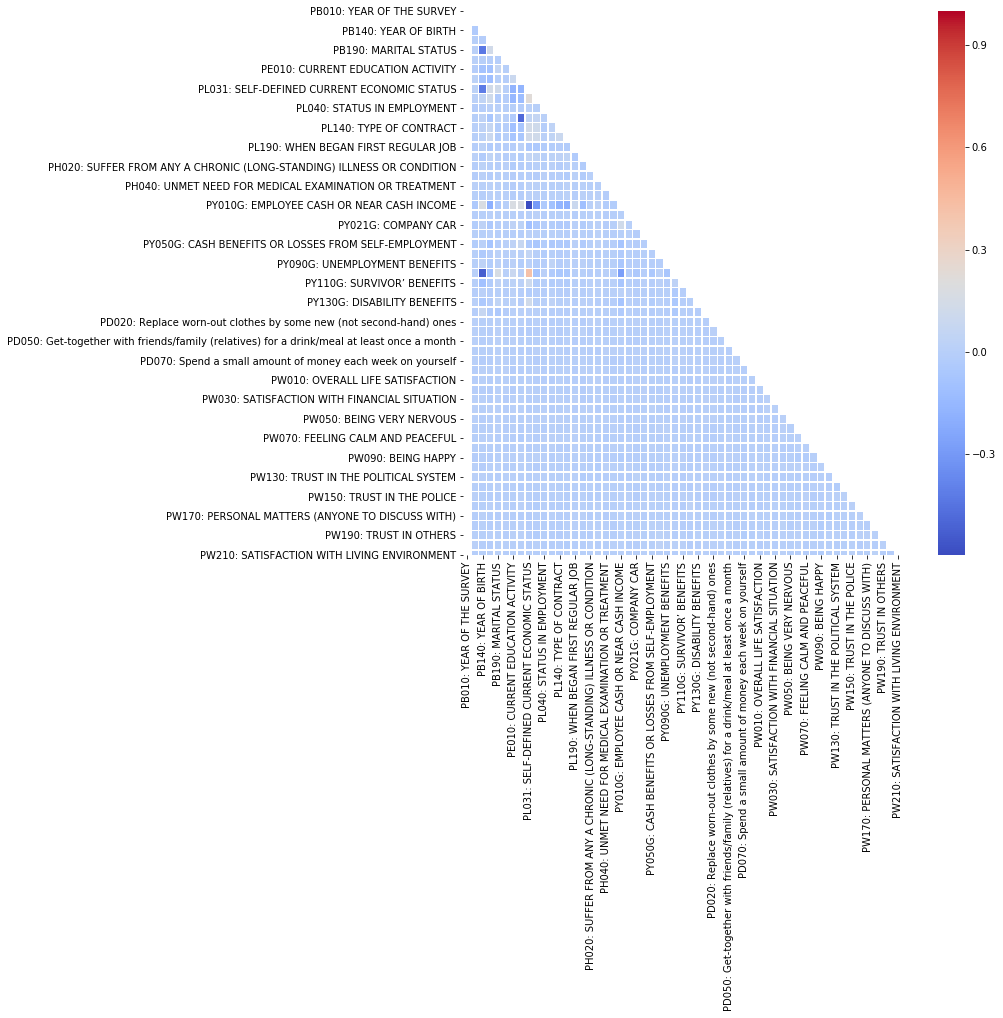

In [41]:
import seaborn as sns
plt.figure(figsize =(10,10))
corr = ppp.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = False, linewidth=0.5, mask=mask)

## 1.3 Conclusion

I focus on the personal survey data, because it has the most observations and the most interesting datas.